In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="data.yaml",epochs=50)

New https://pypi.org/project/ultralytics/8.2.51 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.35  Python-3.10.14 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning P:\SmartHacks\todo\yolo\weeddetection\train\labels.cache... 10032 images, 1 backgrounds, 0 corrupt: 100%|██████████| 10032/10032 [00:00<?, ?it/s]

train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\Nutsedge_235_jpg.rf.16153476afecd4e9fe096568093d2457.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\Nutsedge_235_jpg.rf.1e0e0da839eb9dba6f31d054b0fc1b6b.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\Nutsedge_235_jpg.rf.ab75aa6e6a0496e623a4fa208f39ac68.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\SpottedSpurge_augmented_83_jpg.rf.0604f65456e64601ade788709a8a04d0.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\SpottedSpurge_augmented_83_jpg.rf.593fae9972bf7aaedd47d4076682ef4f.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weeddetection\train\images\SpottedSpurge_augmented_83_jpg.rf.770aca03c7df9d9adc3fd2afaec3c420.jpg: 1 duplicate labels removed
train: WARNING  P:\SmartHacks\todo\yolo\weedde


val: Scanning P:\SmartHacks\todo\yolo\weeddetection\valid\labels.cache... 729 images, 0 backgrounds, 0 corrupt: 100%|██████████| 729/729 [00:00<?, ?it/s]

val: WARNING  P:\SmartHacks\todo\yolo\weeddetection\valid\images\Prickly-Sida_augmented_6_1_jpg.rf.3e92a3f9ac08203b9acbca7eec9a4649.jpg: 1 duplicate labels removed
val: WARNING  P:\SmartHacks\todo\yolo\weeddetection\valid\images\Swinecress_augmented_4_3_jpg.rf.5cccca7f1c1a62f121d27942fc336147.jpg: 1 duplicate labels removed


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G       1.32      4.058      1.652         67        640:   0%|          | 1/627 [00:01<20:28,  1.96s/it]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



0: 640x640 1 crabgrass, 18.2ms
Speed: 1.2ms preprocess, 18.2ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


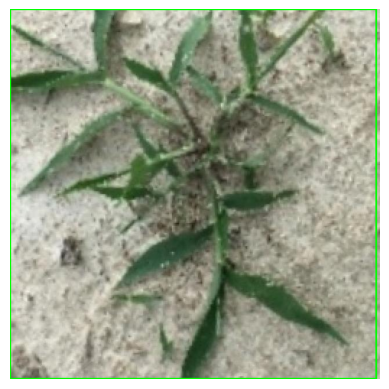

In [4]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define the class names
class_names = [
    "Carpetweeds",
    "Crabgrass",
    "Eclipta",
    "Goosegrass",
    "Morningglory",
    "Nutsedge",
    "Palmeramaranth",
    "Pricklysida",
    "Purslane",
    "Ragweed",
    "Sicklepod",
    "Spottedspurge",
    "Spurredanoda",
    "Swinecress",
    "Waterhemp"
]

# Load the YOLO model
model = YOLO(r"D:\weed detection\runs\detect\train2\weights\last.pt")

# Perform inference
def weed_detection(image_path):
    # Load image
    img = cv2.imread(image_path)
    # Perform inference
    results = model(img)
    
    # Check the structure of the results
    if not results:
        print("No results found.")
        return
    
    # Extract bounding boxes, class ids, and confidence scores
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy().astype(int)
        confidences = result.boxes.conf.cpu().numpy()

        # Draw bounding boxes and labels on the image
        for box, class_id, confidence in zip(boxes, class_ids, confidences):
            label = f"{class_names[class_id]} {confidence:.2f}"
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    weed_predicted=class_names[class_id]
    return(weed_predicted)

# Replace 'path/to/your/image.jpg' with the path to your image

weed_detection(image_path)
